In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

base_path = "/content/drive/MyDrive/데이터분석"
df_path = os.path.join(base_path, "df(6).csv")

# 인코딩 문제 나면 encoding="ISO-8859-1" 또는 "cp949"로 바꿔보기
df = pd.read_csv(df_path)  # 필요하면: df = pd.read_csv(df_path, encoding="cp949")

print(df.shape)
df.head()
print(df.columns)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1831, 24)
Index(['Age', 'Gender', 'Country', 'family_history', 'self_employed',
       'no_employees', 'tech_company', 'Organizational_Care_1',
       'Organizational_Care_2', 'Organizational_Access',
       'Organizational_Support', 'Organizational_Protection',
       'Organizational_Leave', 'mentalhealthconsequence', 'coworkers',
       'supervisors', 'mentalimportance', 'mh_current', 'mh_diagnosed',
       'mh_past', 'mh_treated', 'work_interfere_impact',
       'work_interfere_treated', 'work_interfere_untreated'],
      dtype='object')


In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

base_path = "/content/drive/MyDrive/데이터분석"
df_path = os.path.join(base_path, "df(6).csv")

df = pd.read_csv(df_path)

print(df.shape)
df.head()
print(df.columns)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1831, 24)
Index(['Age', 'Gender', 'Country', 'family_history', 'self_employed',
       'no_employees', 'tech_company', 'Organizational_Care_1',
       'Organizational_Care_2', 'Organizational_Access',
       'Organizational_Support', 'Organizational_Protection',
       'Organizational_Leave', 'mentalhealthconsequence', 'coworkers',
       'supervisors', 'mentalimportance', 'mh_current', 'mh_diagnosed',
       'mh_past', 'mh_treated', 'work_interfere_impact',
       'work_interfere_treated', 'work_interfere_untreated'],
      dtype='object')


In [5]:
ORG = 'Organizational_Support'

# 멘탈 건강 관련 변수들 전체 리스트
MENTAL_VARS = [
    'mh_current',
    'mh_diagnosed',
    'mh_past',
    'mh_treated',
    'work_interfere_impact',
    'work_interfere_treated',
    'work_interfere_untreated',
    'mentalhealthconsequence'
]


In [8]:
ORG = 'Organizational_Support'

MENTAL_VARS = [
    'mh_current',
    'mh_diagnosed',
    'mh_past',
    'mh_treated',
    'work_interfere_impact',
    'work_interfere_treated',
    'work_interfere_untreated',
    'mentalhealthconsequence'
]

corr_results = {}

for var in MENTAL_VARS:
    if var in df.columns:
        # 🔹 상관계수 계산용으로 숫자로 강제 변환 (문자는 NaN 처리)
        sub = df[[ORG, var]].copy()
        sub = sub.apply(pd.to_numeric, errors='coerce')

        # NaN 제거 후 상관계수 계산
        sub = sub.dropna()
        if sub.shape[0] > 0:
            corr = sub.corr().iloc[0, 1]
            corr_results[var] = corr

corr_results



{'mh_treated': np.float64(0.045249286448270885)}

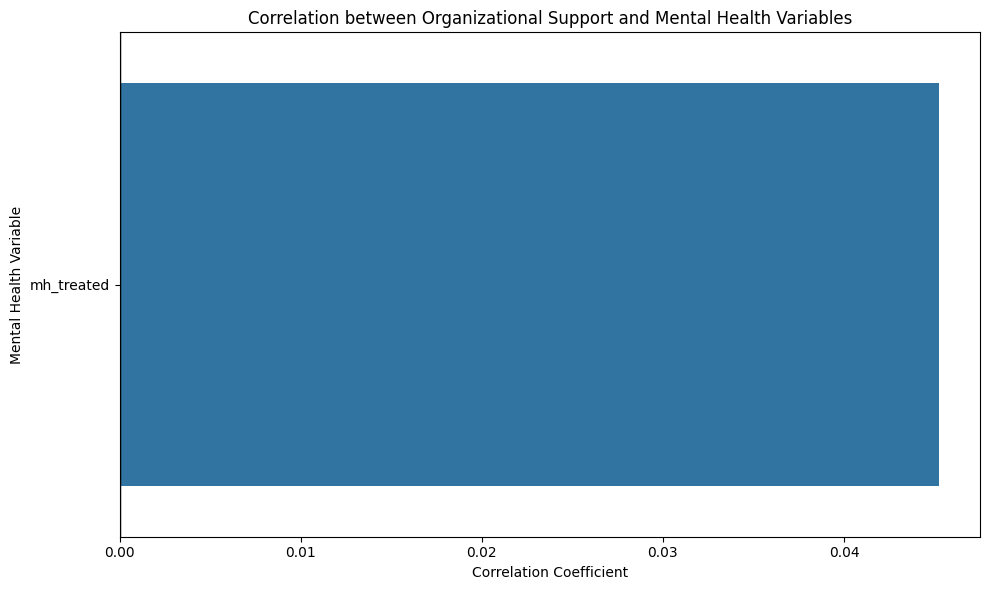

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.barplot(
    x=list(corr_results.values()),
    y=list(corr_results.keys())
)

plt.axvline(0, color='black', linewidth=1)
plt.title("Correlation between Organizational Support and Mental Health Variables")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Mental Health Variable")
plt.tight_layout()
plt.show()


In [10]:
mapping = {
    'No': 0,
    'Yes': 1,
    'Maybe': 0.5,
    'Possibly': 0.5,
    "Don't know": 0.5
}

for var in MENTAL_VARS:
    if df[var].dtype == 'object':  # 문자형일 때만
        df[var + '_num'] = df[var].map(mapping)

# 예: mh_current_num와 Organizational_Support 상관계수
sub = df[[ORG, 'mh_current_num']].apply(pd.to_numeric, errors='coerce').dropna()
sub.corr()


,Organizational_Support,mh_current_num
Organizational_Support,1.000000,0.037715
mh_current_num,0.037715,1.000000


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 조직문화 변수
ORG_VARS = [
    'Organizational_Care_1',
    'Organizational_Care_2',
    'Organizational_Access',
    'Organizational_Support',
    'Organizational_Protection',
    'Organizational_Leave'
]

# 멘탈건강 변수
MENTAL_VARS = [
    'mh_current',
    'mh_diagnosed',
    'mh_past',
    'mh_treated',
    'work_interfere_impact',
    'work_interfere_treated',
    'work_interfere_untreated',
    'mentalhealthconsequence'
]

# Heatmap에 포함시킬 전체 변수
ALL_VARS = ORG_VARS + MENTAL_VARS


In [13]:
# corr 계산을 위해 숫자로 변환 (문자/Yes/No → NaN 처리)
subset = df[ALL_VARS].apply(pd.to_numeric, errors='coerce')


In [14]:
corr_matrix = subset.corr()
corr_matrix


,Organizational_Care_1,Organizational_Care_2,Organizational_Access,Organizational_Support,Organizational_Protection,Organizational_Leave,mh_current,mh_diagnosed,mh_past,mh_treated,work_interfere_impact,work_interfere_treated,work_interfere_untreated,mentalhealthconsequence
Organizational_Care_1,1.000000,0.223029,-0.259606,0.015991,0.173553,-0.042281,NaN,NaN,NaN,-0.080071,NaN,NaN,NaN,NaN
Organizational_Care_2,0.223029,1.000000,0.063359,0.285974,0.089772,-0.096016,NaN,NaN,NaN,-0.002694,NaN,NaN,NaN,NaN
Organizational_Access,-0.259606,0.063359,1.000000,0.203480,-0.175024,-0.109314,NaN,NaN,NaN,0.285099,NaN,NaN,NaN,NaN
Organizational_Support,0.015991,0.285974,0.203480,1.000000,-0.043500,-0.132248,NaN,NaN,NaN,0.045249,NaN,NaN,NaN,NaN
Organizational_Protection,0.173553,0.089772,-0.175024,-0.043500,1.000000,0.029709,NaN,NaN,NaN,0.000606,NaN,NaN,NaN,NaN
Organizational_Leave,-0.042281,-0.096016,-0.109314,-0.132248,0.029709,1.000000,NaN,NaN,NaN,0.061169,NaN,NaN,NaN,NaN
mh_current,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mh_diagnosed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mh_past,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mh_treated,-0.080071,-0.002694,0.285099,0.045249,0.000606,0.061169,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


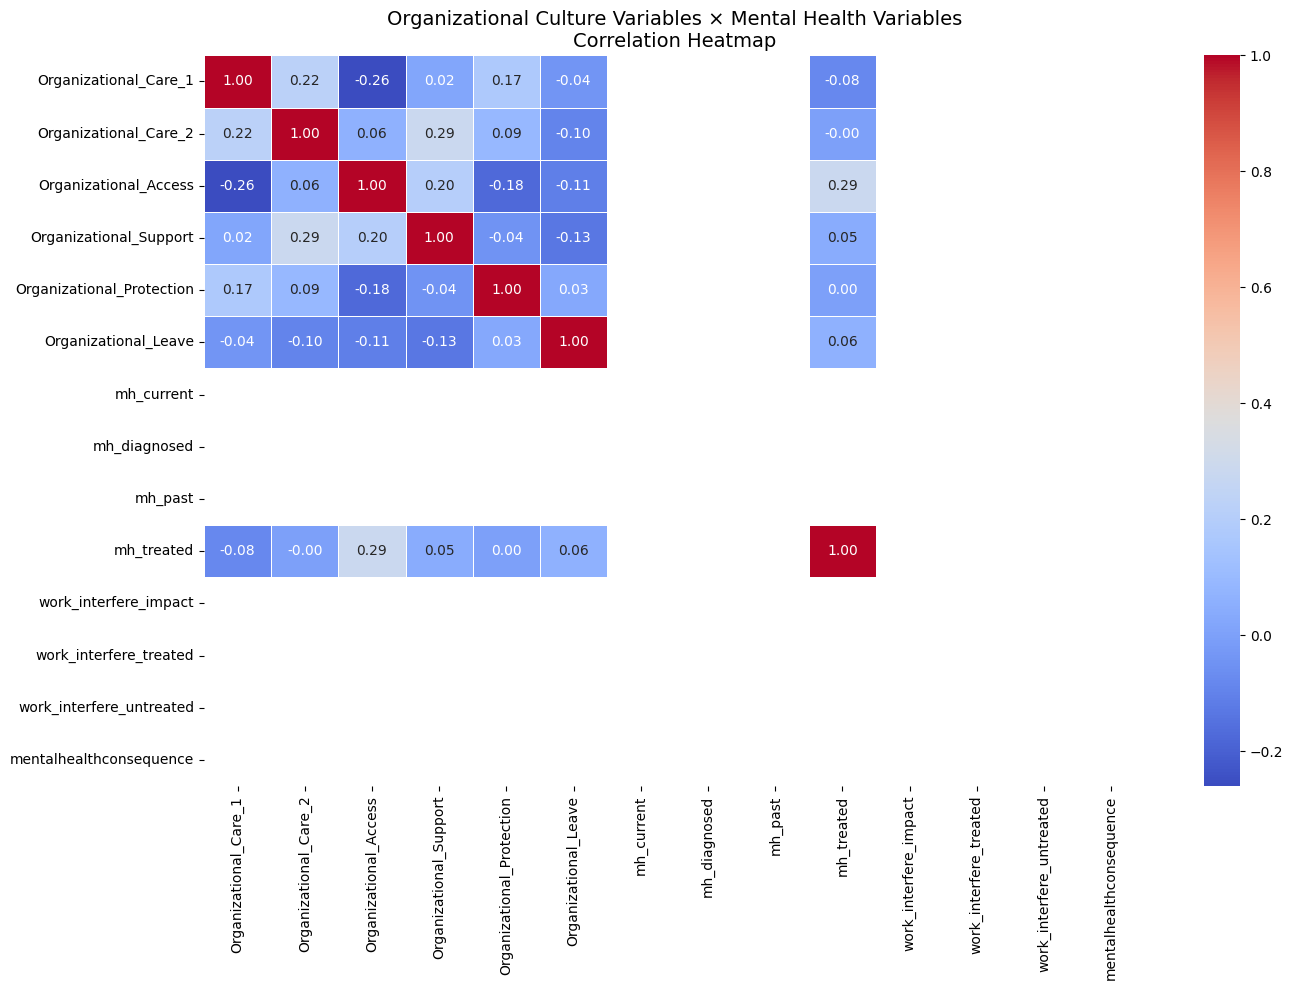

In [15]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,        # 상관계수 숫자 표시
    cmap="coolwarm",   # 빨강·파랑 컬러맵
    fmt=".2f",         # 소수점 둘째자리까지
    linewidths=0.5
)
plt.title("Organizational Culture Variables × Mental Health Variables\nCorrelation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()
